# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

I used the following website to help me answer a question:
- https://stackoverflow.com/questions/37625334/convert-month-int-to-month-name-in-pandas
- I also used ChatGPT to help me consolidate my code into cleaner functions

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import calendar

## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [2]:
# Create dataframe with data from the first csv file
temp_data1_url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv"
temp_data1 = pd.read_csv(temp_data1_url)

# Create dataframe with data from the second csv file
temp_data2_url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv"
temp_data2 = pd.read_csv(temp_data2_url)

# Combine the two Dataframes into one large dataframe
df = pd.concat([temp_data1, temp_data2])
df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139753,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0
139754,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0
139755,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN
139756,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [3]:
# Create dataframe with data from FIPS code csv file
FIPS_url = 'https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv'
FIPS = pd.read_csv(FIPS_url)
FIPS

,FIPS 10-4,ISO 3166,Name
0,AF,AF,Afghanistan
1,AX,-,Akrotiri
2,AL,AL,Albania
3,AG,DZ,Algeria
4,AQ,AS,American Samoa
...,...,...,...
274,-,-,World
275,YM,YE,Yemen
276,-,-,Zaire
277,ZA,ZM,Zambia


In [4]:
# Create dataframe with data from station_metadata csv file
station_url = 'https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv'
station = pd.read_csv(station_url)
station

,ID,LATITUDE,LONGITUDE,STNELEV,NAME
0,ACW00011604,57.7667,11.8667,18.0,SAVE
1,AE000041196,25.3330,55.5170,34.0,SHARJAH_INTER_AIRP
2,AEM00041184,25.6170,55.9330,31.0,RAS_AL_KHAIMAH_INTE
3,AEM00041194,25.2550,55.3640,10.4,DUBAI_INTL
4,AEM00041216,24.4300,54.4700,3.0,ABU_DHABI_BATEEN_AIR
...,...,...,...,...,...
27580,ZI000067983,-20.2000,32.6160,1132.0,CHIPINGE
27581,ZI000067991,-22.2170,30.0000,457.0,BEITBRIDGE
27582,ZIXLT371333,-17.8300,31.0200,1471.0,HARARE_BELVEDERE
27583,ZIXLT443557,-18.9800,32.4500,1018.0,GRAND_REEF


In [5]:
# Extract the first two characters of the ID to get the FIPS code
df["FIPS 10-4"] = df["ID"].str[0:2]

# Merge the FIPS data frame with the large temperature data frame matching the FIPS code
df = pd.merge(df, FIPS, on = ["FIPS 10-4"])

# Merge the station data frame with the large temperature dataframe matching the ID
df = pd.merge(df, station, on = ["ID"])

In [6]:
# remove unnecessary columns from the dataframe
df = df.drop(["FIPS 10-4", "ISO 3166", "STNELEV"], axis = 1)

# Put all of the months data into a single month column by stacking and then unstacking the data
df = df.set_index(keys = ["ID", "Year", "Name", "LATITUDE", "LONGITUDE", "NAME"])
df = df.stack()
df = df.reset_index()

# Appropriately rename the new data columns
df = df.rename( columns = {"Name" : "Country", "level_6" : "Month", 0: "Temp"})

# Convert the month column to numbers by removing "VALUE"
df["Month"] = df["Month"].str[5].astype(int)
df

,ID,Year,Country,LATITUDE,LONGITUDE,NAME,Month,Temp
0,AG000060390,1901,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA,1,1034.0
1,AG000060390,1901,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA,2,844.0
2,AG000060390,1901,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA,3,1164.0
3,AG000060390,1901,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA,4,1534.0
4,AG000060390,1901,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA,5,1564.0
...,...,...,...,...,...,...,...,...
1899682,ZAM00067663,2012,Zambia,-14.4500,28.467,KABWE_MILLIKEN,4,1970.0
1899683,ZAM00067663,2012,Zambia,-14.4500,28.467,KABWE_MILLIKEN,5,1850.0
1899684,ZAM00067663,2012,Zambia,-14.4500,28.467,KABWE_MILLIKEN,6,1750.0
1899685,ZAM00067663,2015,Zambia,-14.4500,28.467,KABWE_MILLIKEN,1,2485.0


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [7]:
def query_climate(df, country, year_begin, year_end, month):
    
    """
    Create a Pandas dataframe of temperature readings for the specified country, 
    in the specified date range, in the specified month of the year.
    
    Args:
    df is a Pandas dataframe
    country is a string
    year_begin is an integer
    year_end is an integer
    month is an integer
    
    Output:
    This function will return a Pandas dataframe according to the inputted specifications.
    """
    
    # go through the data and only keep data that matches the specified country, year timeframe, and month
    select_data = df[(df["Country"] == country) & (df["Year"] >= year_begin) & 
                     (df["Year"] <= year_end) & (df["Month"] == month)]
    
    # create a new dataframe only with the desired columns
    new_df = select_data[['NAME', 'LATITUDE', 'LONGITUDE', 'Country', 'Year', 'Month', 'Temp']]
    return new_df

Run this example and check if you get the correct result, your obtained dataframe looks like:

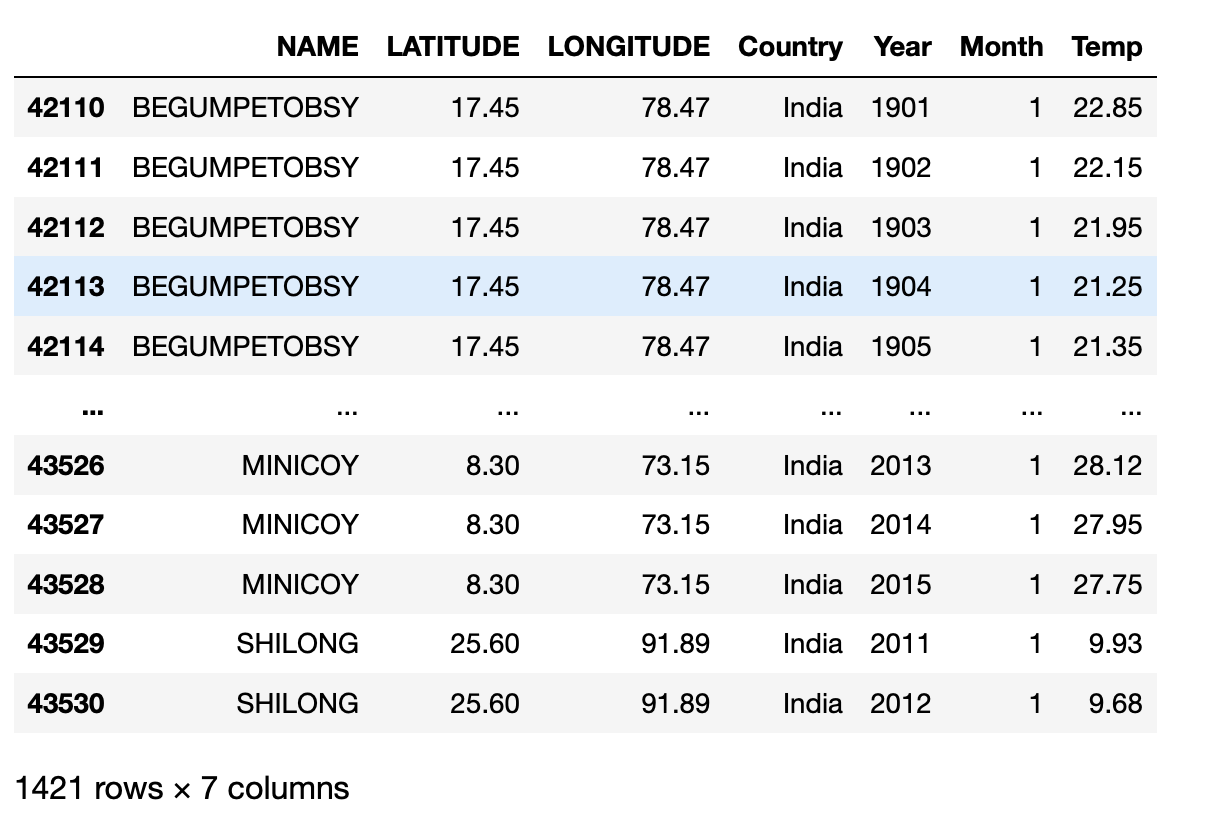

In [8]:
# the passing dataframe 'df' below is the dataframe you create in part 2
query_climate(df = df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
442659,BEGUMPETOBSY,17.45,78.47,India,1901,1,2285.0
442668,BEGUMPETOBSY,17.45,78.47,India,1901,1,2565.0
442669,BEGUMPETOBSY,17.45,78.47,India,1901,1,2305.0
442670,BEGUMPETOBSY,17.45,78.47,India,1901,1,2105.0
442671,BEGUMPETOBSY,17.45,78.47,India,1902,1,2215.0
...,...,...,...,...,...,...,...
458454,SHILONG,25.60,91.89,India,2011,1,993.0
458462,SHILONG,25.60,91.89,India,2011,1,1882.0
458463,SHILONG,25.60,91.89,India,2011,1,1481.0
458464,SHILONG,25.60,91.89,India,2011,1,1250.0


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

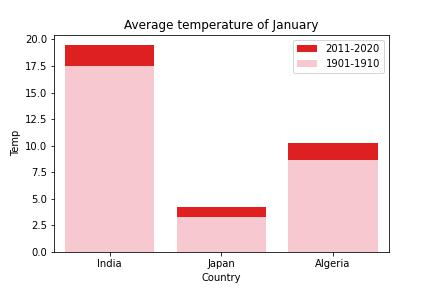

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

In [9]:
def avg_temp(df, country, month, years):
    """
    Calculates the average temperature in selected countries for a given range
    
    Args:
    df is a dataframe
    country is a list of countries
    month is a list of months
    years is a list with decade year ranges
    
    Output:
    Will return a dictionary of all calculated average temperatures
    
    """
    # initalize a dictionary to store calculated temperatures
    avg_temp = {}
    
    for c in country:
        avg_temp[c] = {}
        for m in month:
            avg_temp[c][m] = []
            for y in years:
                # Calculate average temps for each country in month and year ranges
                calc_avg_temp = df[(df['Country'] == c) & 
                              (df['Year'] >= y[0]) & 
                              (df['Year'] <= y[1]) & 
                              (df['Month'] == m)]['Temp'].mean()
                avg_temp[c][m].append(calc_avg_temp)
    return avg_temp


def plot_temps(avg_temp, months, years):
    """
    Create plots for the average temperatures for each country according to months and years
    
    Args:
    avg_temp is a dictionary of all the calculated average temperatures
    months is a list of months
    years is a list of year ranges
    """
    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Initialize plots
    fig, axs = plt.subplots(len(months), 1, figsize=(10, 20), sharex=True)
    fig.suptitle('Average Temperatures for Select Months')

    # Plot the data for each month
    for i, month in enumerate(months):
        axs[i].set_title(f'Month: {month_names[month-1]}')
        axs[i].set_ylabel('Average Temperature')
        
        # Prepare data for plotting
        country_labels = []
        first_decade_temps = []
        second_decade_temps = []
        for country, temps in avg_temp.items():
            country_labels.append(country)
            first_decade_temps.append(temps[month][0])
            second_decade_temps.append(temps[month][1])
        
        # Plot the bar chart
        axs[i].bar(country_labels, first_decade_temps, label=f'{years[0][0]}-{years[0][1]}')
        axs[i].bar(country_labels, second_decade_temps, bottom=first_decade_temps, label=f'{years[1][0]}-{years[1][1]}')
        axs[i].legend(title='Year Range', loc='upper right')
    
    plt.xlabel('Country')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

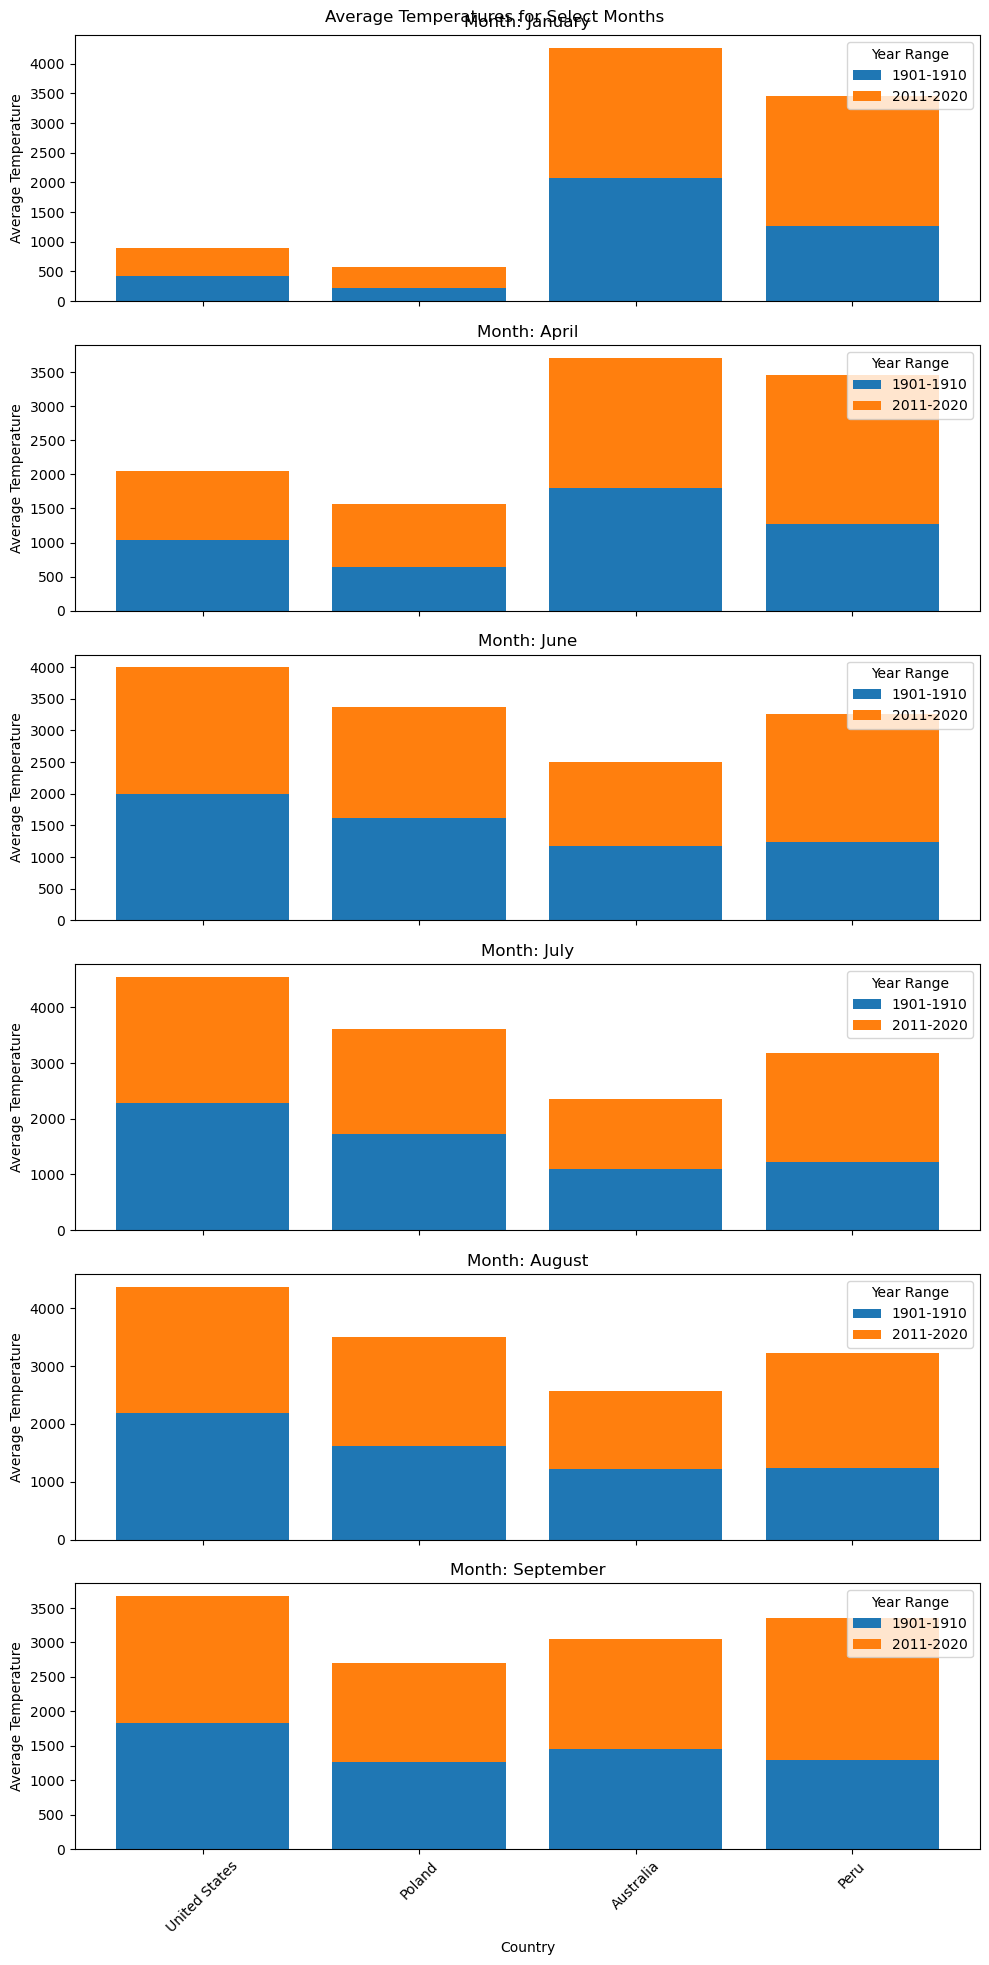

In [10]:
# Define the countries, months, and year ranges
countries = ['United States', 'Poland', 'Australia', 'Peru']
months = [1, 4, 6, 7, 8, 9]
years = [(1901, 1910), (2011, 2020)]

# Calculate average temperatures
avg_temps = avg_temp(df, countries, months, years)

# plot average temperatures
plot_temps(avg_temps, months, years)

- The average temperature in the second decade is a lot higher than the first decade across the board.
- Also, in January and April, Australia has the highest temperature compared to other countries but in other months like June, July, and August, it has the lowest temperature. This likely has to do with Australia being located in the Southern Hemisphere so during our Winter, they are experiencing Summer.

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

C:\Users\Sarah\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

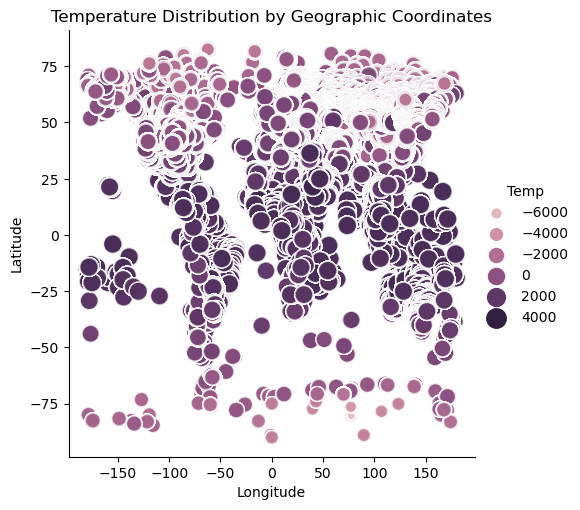

In [11]:
# Scatter plot
plt.figure(figsize=(12, 8))
sns.relplot(data=df, x='LONGITUDE', y='LATITUDE', hue='Temp', size='Temp', sizes=(20, 200), alpha=0.7)
plt.title('Temperature Distribution by Geographic Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

With this plot, you can visualize the temperature of various geographic locations according to latitude and longitude. The color and size of the points represent the temperature in which the larger and darker the point is, the hotter it is. In general, this plot shows it is a lot warmer around the equator (0 latitude) and much colder as you get closer to the north and south pole.

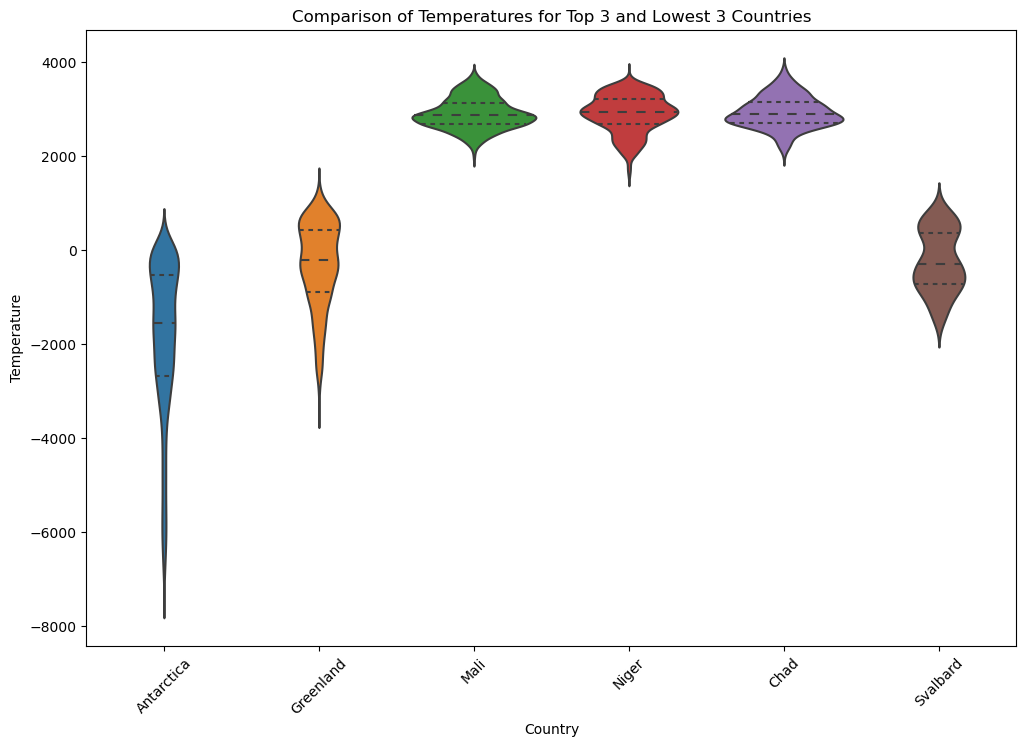

In [12]:
# Violin Plot

# Calculate the average temperature for each country
avg_temp = df.groupby('Country')['Temp'].mean().sort_values()

# Select the top 3 and bottom 3 countries based on average temperature
countries = avg_temp.head(3).index.tolist() + avg_temp.tail(3).index.tolist()

# New dataframe to include only selected countries
new_df = df[df['Country'].isin(countries)]

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=new_df, x='Country', y='Temp', inner='quartile')

# Set the title and labels
plt.title('Comparison of Temperatures for Top 3 and Lowest 3 Countries')
plt.xlabel('Country')
plt.ylabel('Temperature')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In this violin plot, I wanted to visualize the temperature distribution between the countries with the top average temperature and the top three countries with the lowest average temperature. As we can see, Mali, Niger, and Chad are much hotter than the other three countries in which their data almost entirely surpasses that of the other three countries. Meanwhile, you can clearly see why Antarctica, Greenland, and Svalbard have the lowest average temperatures as majority of their data is at or below 0. This is especially true about Antarctica as there is no doubt that it is the coldest country.

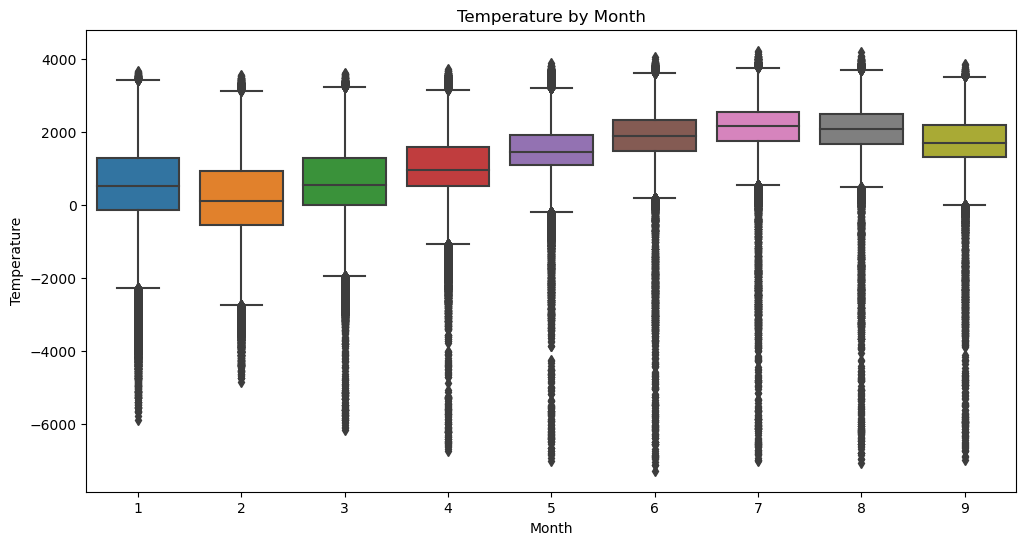

In [13]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Temp', data=df)
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Temperature by Month')
plt.show()

This boxplot visualizes the temperature across every month. The average hottest months across all countries are June, July, and August with February being the coldest. Of course, we see lots of outliers as, even though June is the third hottest month, it still shows data that plots some of the coldest temperatures. The temperatures definitely vary in every country throughout the year. However, for the most part, as shown by the interquartile range of the box plots, the average temperature fluctuates between months across majority of countries as we know it here in the United States.

## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell